In [2]:
import tensorflow as tf
from PIL import Image
import math
import numpy as np
import tensorflow_addons as tfa

real_image_path = "/cluster/scratch/aarslan/virtual_humans_data/face/train/output/0034373.png"
input_image_path = "/cluster/scratch/aarslan/virtual_humans_data/face/train/input/0034373.png"
real_image = tf.io.decode_png(tf.io.read_file(real_image_path))
input_image = tf.io.decode_png(tf.io.read_file(input_image_path))

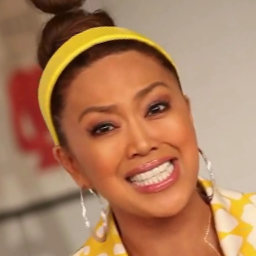

In [8]:
radian = 0.2618

display(Image.fromarray(tfa.image.rotate(real_image, radian, interpolation="BILINEAR", fill_mode="reflect").numpy()))

In [14]:
def normalize(image):
    return (tf.cast(image, tf.float32) / 127.5) - 1.0


def add_salt_and_pepper_noise(image, prob_salt=0.0002, prob_pepper=0.0001):
    random_values = tf.random.uniform(shape=(256, 256, 1))
    return tf.where(
        1 - random_values < prob_pepper,
        tf.cast(0, tf.uint8),
        tf.where(random_values < prob_salt, tf.cast(255, tf.uint8), image),
    )


def add_colored_noise(image, prob_colored=0.0002):
    random_values_1 = tf.random.uniform(shape=(256, 256, 3))
    random_values_2 = tf.cast(
        tf.random.uniform(shape=(256, 256, 3), dtype=tf.int32, minval=0, maxval=255),
        tf.uint8,
    )
    return tf.where(random_values_1 < prob_colored, random_values_2, image)

In [15]:
input_image = tf.io.decode_png(tf.io.read_file(input_image_path))
real_image = tf.io.decode_png(tf.io.read_file(real_image_path))
real_image = tf.image.random_brightness(real_image, max_delta=0.10)
real_image = tf.image.random_contrast(real_image, lower=0.60, upper=1.40)
real_image = tf.image.random_hue(real_image, max_delta=0.05)
real_image = tf.image.random_saturation(real_image, lower=0.75, upper=1.25)

real_image = add_salt_and_pepper_noise(real_image)
real_image = add_colored_noise(real_image)
stacked_image = tf.concat([real_image, input_image], axis=-1)
stacked_image = tf.image.random_flip_left_right(stacked_image)
stacked_image = normalize(stacked_image)
stacked_image = tfa.image.rotate(stacked_image, 0.2618, interpolation="BILINEAR")
stacked_image = tf.image.resize(
    stacked_image, [286, 286], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
)
stacked_image = tf.image.random_crop(
    stacked_image, size=(256, 256, stacked_image.shape[-1])
)
real_image = stacked_image[:, :, :3]
input_image = stacked_image[:, :, 3:]

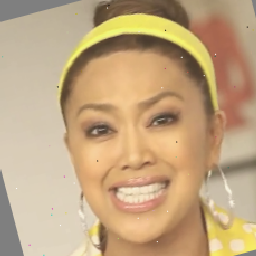

In [16]:
display(Image.fromarray( ((real_image.numpy() + 1) * 255 / 2).astype(np.uint8) ) )

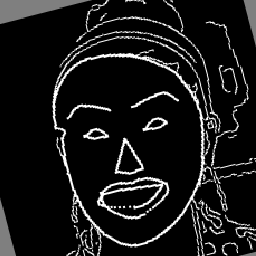

In [20]:
display(Image.fromarray( ((tf.repeat(input_image, [3], axis=-1).numpy() + 1) * 255 / 2).astype(np.uint8) ) )

In [83]:
image0 = Image.fromarray(real_image.numpy())
image1 = Image.fromarray(tf.image.random_brightness(real_image, max_delta=0.10).numpy())
image2 = Image.fromarray(tf.image.random_contrast(real_image, lower=0.60, upper=1.40).numpy())
image3 = Image.fromarray(tf.image.random_hue(real_image, max_delta=0.05).numpy())
image4 = Image.fromarray(tf.image.random_saturation(real_image, lower=0.75, upper=1.25).numpy())
image5 = Image.fromarray(tfa.image.rotate(real_image, 15 * math.pi / 180, interpolation='BILINEAR').numpy())
image6 = Image.fromarray(add_salt_and_pepper_noise(real_image, prob_salt=0.001, prob_pepper=0.001).numpy())

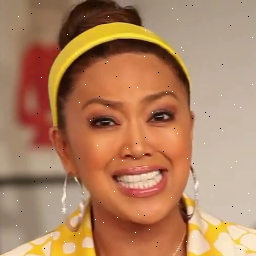

In [84]:
image6